In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/samsung-electronics-stock-price-2000-2024/samsung dataset.csv


In [11]:
df = pd.read_csv("../input/samsung dataset.csv", delimiter=';')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,04/01/2000,6000000000,6110000000,5660000000,6110000000,4651737793,74195000
1,05/01/2000,5800000000,6060000000,5520000000,5580000000,4248232422,74680000
2,06/01/2000,5750000000,5780000000,5580000000,5620000000,4278686523,54390000
3,07/01/2000,5560000000,5670000000,5360000000,5540000000,4217780273,40305000
4,10/01/2000,5600000000,5770000000,5580000000,5770000000,4392884766,46880000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6056 entries, 0 to 6055
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       6056 non-null   object
 1   Open       6056 non-null   int64 
 2   High       6056 non-null   int64 
 3   Low        6056 non-null   int64 
 4   Close      6056 non-null   int64 
 5   Adj Close  6056 non-null   object
 6   Volume     6056 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 331.3+ KB


In [6]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


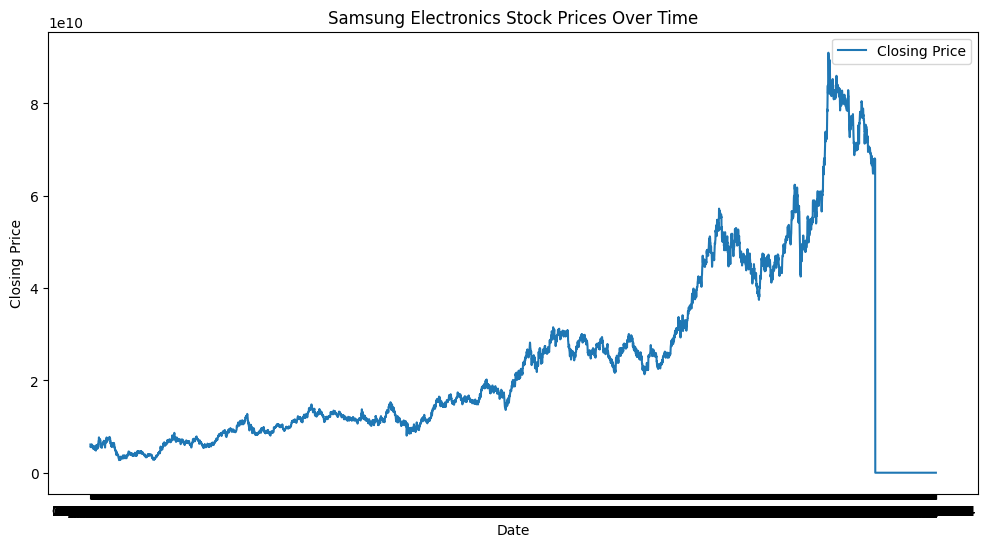

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Samsung Electronics Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1200x800 with 0 Axes>

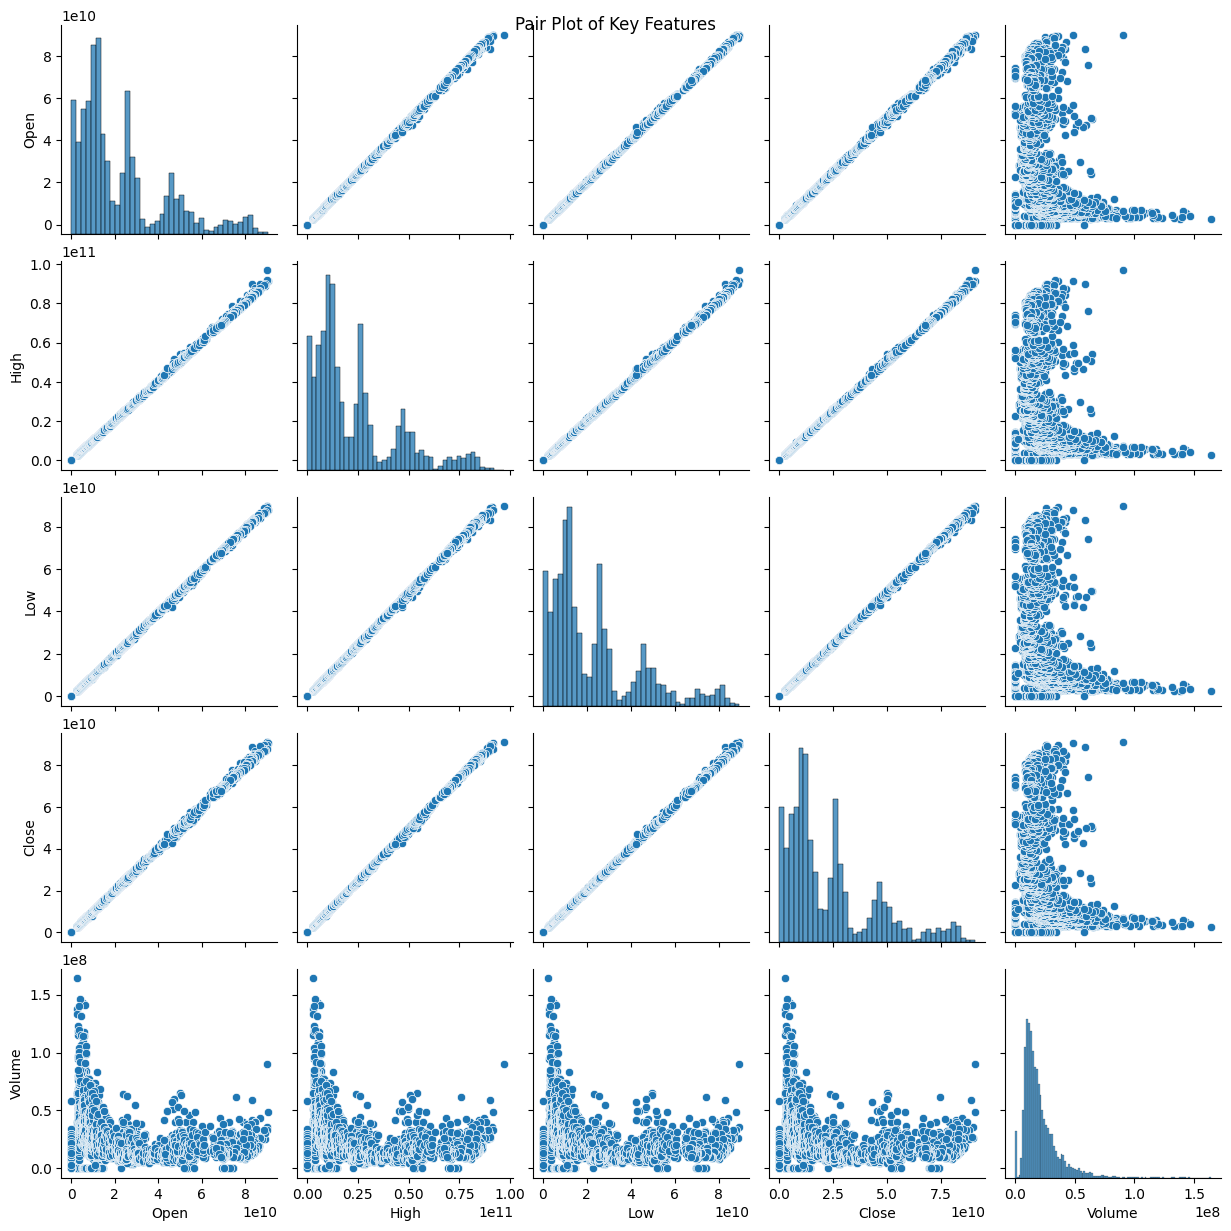

In [8]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.suptitle('Pair Plot of Key Features')
plt.show()

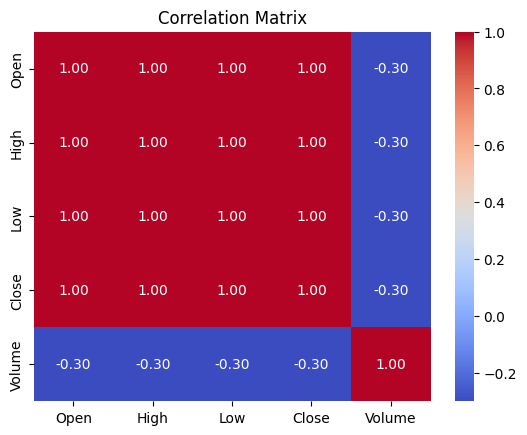

In [9]:
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

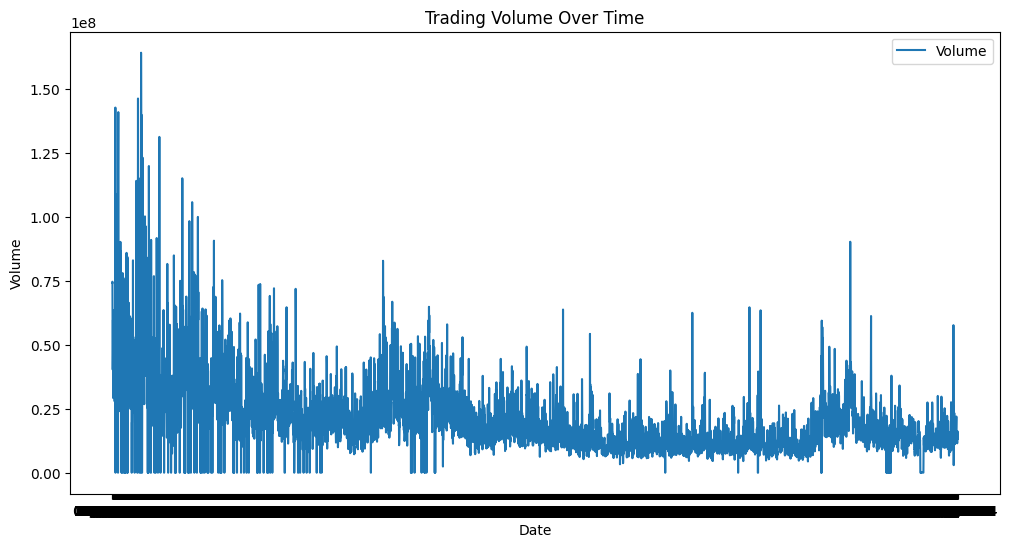

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Volume')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Close_scaled'] = scaler.fit_transform(df[['Close']])
X = df['Close_scaled'].values
y = df['Close_scaled'].shift(-1).dropna().values
X = X[:len(y)]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=5, batch_size=1, verbose=1)

Epoch 1/5
4844/4844 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.0034
Epoch 2/5
4844/4844 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 7.1931e-05
Epoch 3/5
4844/4844 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 6.0348e-05
Epoch 4/5
4844/4844 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 7.6012e-05
Epoch 5/5
4844/4844 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 6.9082e-05


In [23]:
predictions = model.predict(X_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [28]:
from sklearn.metrics import mean_squared_error
mse_lstm = mean_squared_error(y_test, predictions)
mse_lstm

0.001797928432155205

In [29]:
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

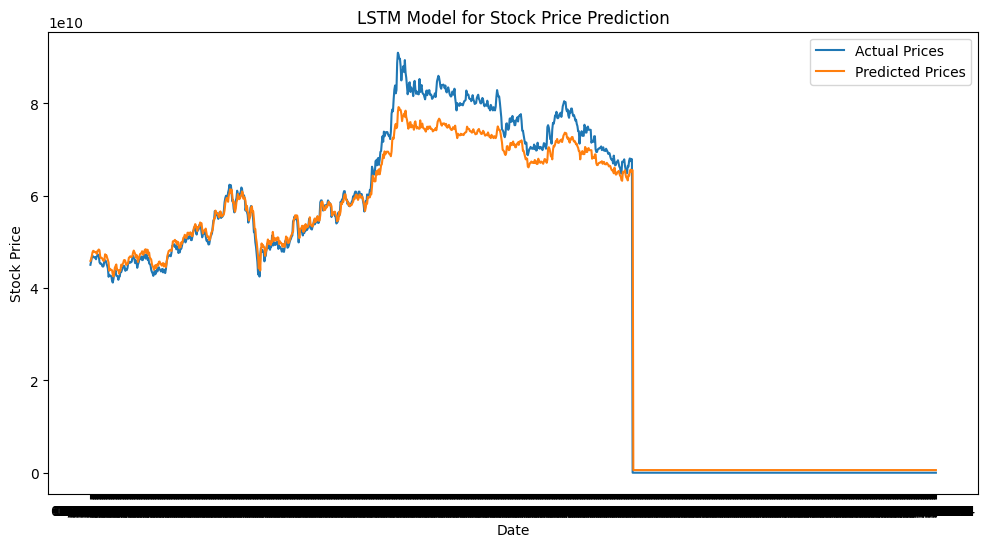

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][-len(y_test):], y_test_inv, label='Actual Prices')
plt.plot(df['Date'][-len(y_test):], predictions_inv, label='Predicted Prices')
plt.title('LSTM Model for Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()